In [1]:
## Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing

## Import datasets

### Barcelona criminality (Mossos)

In [2]:
bcn_crime = pd.read_csv('crimes_barcelona.csv')

In [3]:
bcn_crime.head(3)

,Unnamed: 0,month,month_name,year,RP,ABP,type_of_crime,number_of_crimes
0,0,1,gener,2019,RP Metropolitana Nord,ABP Arenys de Mar,Homicidi consumat,1
1,1,1,gener,2019,RP Metropolitana Nord,ABP Arenys de Mar,Homicidi temptativa,1
2,2,1,gener,2019,RP Metropolitana Nord,ABP Arenys de Mar,De la usurpació de l'estat civil,2


In [4]:
##Remove unwanted columns
bcn_crime = bcn_crime.drop(['Unnamed: 0', 'month_name'], axis=1)

In [5]:
##Create "fake" day and date columns
bcn_crime['day'] = 1

In [6]:
bcn_crime['date'] = bcn_crime.apply(lambda x : str(x.year)+'-'+str(x.month)+'-'+str(x.day), axis=1)
bcn_crime['date'] = pd.to_datetime(bcn_crime.date, format='%Y/%m/%d')

In [7]:
##Change columns order
bcn_crime = bcn_crime[['RP', 'ABP', 'type_of_crime', 'number_of_crimes', 'year', 'month', 'day', 'date']]

In [8]:
##Filter only Barcelona
bcn_crime = bcn_crime[bcn_crime.RP == 'RP Metropolitana Barcelona']

In [9]:
##Create a dataset copy for backup
bcn_crime_original = bcn_crime.copy()
bcn_crime_original.to_csv('bcn_crime_clean.csv')

In [10]:
bcn_crime.loc[bcn_crime["type_of_crime"] == "Furt"].sum()

RP                  RP Metropolitana BarcelonaRP Metropolitana Bar...
ABP                 ABP BarcelonaABP Ciutat VellaABP EixampleABP G...
type_of_crime       FurtFurtFurtFurtFurtFurtFurtFurtFurtFurtFurtFu...
number_of_crimes                                               676626
year                                                          2393820
month                                                            7722
day                                                              1188
dtype: object

In [11]:
bcn_crime

,RP,ABP,type_of_crime,number_of_crimes,year,month,day,date
759,RP Metropolitana Barcelona,ABP Barcelona,Falsedats documentals,2,2019,1,1,2019-01-01
760,RP Metropolitana Barcelona,ABP Barcelona,Lesions,2,2019,1,1,2019-01-01
761,RP Metropolitana Barcelona,ABP Barcelona,Danys,10,2019,1,1,2019-01-01
762,RP Metropolitana Barcelona,ABP Barcelona,Estafes,8,2019,1,1,2019-01-01
763,RP Metropolitana Barcelona,ABP Barcelona,Furt,123,2019,1,1,2019-01-01
...,...,...,...,...,...,...,...,...
172792,RP Metropolitana Barcelona,ABP Sarrià-Sant Gervasi,Contra els drets i deures familiars,1,2011,12,1,2011-12-01
172793,RP Metropolitana Barcelona,ABP Sarrià-Sant Gervasi,Altres delictes contra l'ordre públic,3,2011,12,1,2011-12-01
172794,RP Metropolitana Barcelona,ABP Sarrià-Sant Gervasi,Faltes contra el patrimoni,274,2011,12,1,2011-12-01
172795,RP Metropolitana Barcelona,ABP Sarrià-Sant Gervasi,Faltes contra les persones,35,2011,12,1,2011-12-01


### Twitter mentions

In [12]:
## Import Twitter data
tweets1 = pd.read_csv('tweets1.csv')
tweets2 = pd.read_csv('tweets2.csv')
tweets = pd.concat([tweets1, tweets2], axis=0)

In [13]:
tweets.head(3)

,Unnamed: 0,hashtags,likes,links,replies,retweets,screen_name,text,text_html,timestamp,tweet_id,tweet_url,user_id,username,year,month,day
0,0,"['Barcelona', 'Hospitalet']",0.0,['http://ow.ly/l045307S1dW'],0.0,0.0,elperiodicoLH,.@mossos investiguen si el tiroteig de #Barcel...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2017-01-10 17:47:59,8.188771e+17,/elperiodicoLH/status/818877057178468352,619011019.0,EL PERIÓDICO L’Hospitalet,2017,1,10
1,1,"['Barcelona', 'Hospitalet']",0.0,['http://ow.ly/Zw8Q307RYTT'],0.0,0.0,elperiodicoLH,.@Mossos investigan si el tiroteo de #Barcelon...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2017-01-10 17:32:03,8.188730e+17,/elperiodicoLH/status/818873047318929408,619011019.0,EL PERIÓDICO L’Hospitalet,2017,1,10
2,2,[],0.0,['http://ww.abc.es/pXWB307RGLV'],0.0,0.0,ABC_Barcelona,El juez cita a declarar a los padres de Nadia ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2017-01-10 15:50:13,8.188474e+17,/ABC_Barcelona/status/818847421941870592,212309697.0,ABC Barcelona,2017,1,10


In [14]:
##Remove unwanted columns
tweets = tweets.drop(['Unnamed: 0', 'screen_name', 'username', 'user_id', 'tweet_url', 'text', 'text_html', 'links', 'hashtags', 'likes', 'retweets', 'replies'], axis=1)

In [15]:
##Create a dataset copy for backup
tweets_original = tweets.copy()
tweets_original.to_csv('tweets_clean.csv')

### Spain criminality (Ministerio Interior)

In [16]:
## Import data
spain_crime = pd.read_csv('crimes_spain.csv')

In [17]:
spain_crime.head(3)

,Unnamed: 0,crime,quantity,year,trimester,city
0,0,1.-Homicidios dolosos y asesinatos consumados,0,2019,1,Córdoba
1,1,2.-Homicidios dolosos y asesinatos en grad...,0,2019,1,Córdoba
2,2,3.-Delitos graves y menos graves de lesion...,18,2019,1,Córdoba


In [18]:
##Remove unwanted columns
spain_crime = spain_crime.drop(['Unnamed: 0'], axis=1)

In [19]:
##Create "fake" month, day and date columns
def month_check(trimester):
    month = 0
    if trimester == 1:
        month = 3
    if trimester == 2:
        month = 6      
    if trimester == 3:
        month = 9
    if trimester == 4:
        month = 12       
    return month
    
spain_crime['month'] = spain_crime.apply(lambda x : month_check(x['trimester']), axis = 1)
spain_crime['day'] = 1
spain_crime['date'] = spain_crime.apply(lambda x : str(x.year)+'-'+str(x.month)+'-'+str(x.day), axis=1)
spain_crime['date'] = pd.to_datetime(spain_crime.date, format='%Y/%m/%d')

In [20]:
##Change columns order
spain_crime = spain_crime[['crime', 'quantity', 'city', 'year', 'trimester', 'month', 'day', 'date']]

In [21]:
##Create a dataset copy for backup
spain_crime_original = spain_crime.copy()

### Spain population (Wikipedia)

In [22]:
## Import data
spain_population = pd.read_csv('cities_population.csv')

In [23]:
spain_population.head()

,Unnamed: 0,city,population,provincia,ccaa
0,0,Madrid,3266126,Madrid,Comunidad de Madrid
1,1,Barcelona,1636762,Barcelona,Cataluña
2,2,Valencia,794288,Valencia,Comunidad Valenciana
3,3,Sevilla,688592,Sevilla,Andalucía
4,4,Zaragoza,674997,Zaragoza,Aragón


In [24]:
##Remove unwanted columns
spain_population = spain_population.drop(['Unnamed: 0'], axis=1)

In [25]:
##Create a dataset copy for backup
spain_population_original = spain_population.copy()

## First exploratory analysis

### BCN crime evolution 2011 - 2019

In [26]:
bcn_crime.head()

,RP,ABP,type_of_crime,number_of_crimes,year,month,day,date
759,RP Metropolitana Barcelona,ABP Barcelona,Falsedats documentals,2,2019,1,1,2019-01-01
760,RP Metropolitana Barcelona,ABP Barcelona,Lesions,2,2019,1,1,2019-01-01
761,RP Metropolitana Barcelona,ABP Barcelona,Danys,10,2019,1,1,2019-01-01
762,RP Metropolitana Barcelona,ABP Barcelona,Estafes,8,2019,1,1,2019-01-01
763,RP Metropolitana Barcelona,ABP Barcelona,Furt,123,2019,1,1,2019-01-01


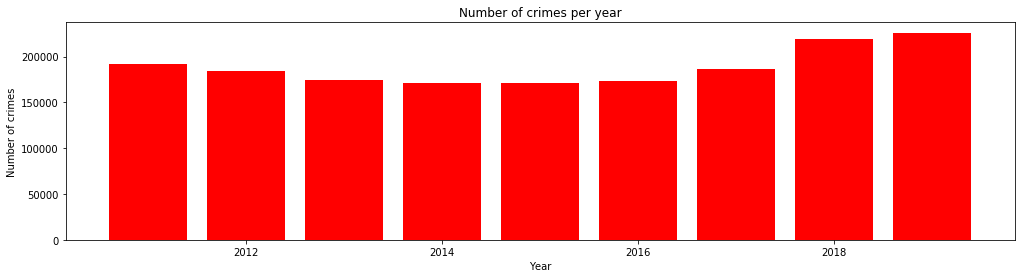

In [27]:
##Crime evolution per year -- totals
bcn_crime_per_year = bcn_crime.groupby(['year'], as_index = False).sum()

x = bcn_crime_per_year['year']
y = bcn_crime_per_year['number_of_crimes']
plt.figure(figsize=(17, 4))
plt.bar(x, y, color='red')
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.title('Number of crimes per year')
plt.show()

In [28]:
##Crime evolution per year -- % grouth

bcn_crime_per_year_perc = bcn_crime_per_year.drop(['month', 'day'], axis=1).copy()
bcn_crime_per_year_perc['#_previous_year'] = bcn_crime_per_year_perc.number_of_crimes.shift()
bcn_crime_per_year_perc['%_grouth'] = bcn_crime_per_year_perc.apply(lambda x : (x['number_of_crimes'] - x['#_previous_year'])/x['#_previous_year'], axis=1)
bcn_crime_per_year_perc['cum_sum'] = bcn_crime_per_year_perc['%_grouth'].cumsum()
bcn_crime_per_year_perc = bcn_crime_per_year_perc[bcn_crime_per_year_perc.year != 2011]

In [29]:
bcn_crime_per_year_perc

,year,number_of_crimes,#_previous_year,%_grouth,cum_sum
1,2012,183844,191654.0,-0.040751,-0.040751
2,2013,174274,183844.0,-0.052055,-0.092806
3,2014,171584,174274.0,-0.015435,-0.108241
4,2015,171721,171584.0,0.000798,-0.107443
5,2016,173284,171721.0,0.009102,-0.098341
6,2017,186829,173284.0,0.078166,-0.020174
7,2018,219521,186829.0,0.174984,0.154809
8,2019,226150,219521.0,0.030198,0.185007


### BCN crime trends

#### By month

In [30]:
bcn_crime_per_month = bcn_crime_original.copy()

In [31]:
bcn_crime_per_month = bcn_crime_per_month.groupby(['year', 'month'], as_index = False).sum().copy()
bcn_crime_per_month = bcn_crime_per_month.drop(['day'], axis=1)

In [32]:
crime_per_month_2019 = bcn_crime_per_month[(bcn_crime_per_month['year'] == 2019)]
crime_per_month_2018 = bcn_crime_per_month[(bcn_crime_per_month['year'] == 2018)]
crime_per_month_2017 = bcn_crime_per_month[(bcn_crime_per_month['year'] == 2017)]
crime_per_month_2016 = bcn_crime_per_month[(bcn_crime_per_month['year'] == 2016)]
crime_per_month_2015 = bcn_crime_per_month[(bcn_crime_per_month['year'] == 2015)]
crime_per_month_2014 = bcn_crime_per_month[(bcn_crime_per_month['year'] == 2014)]

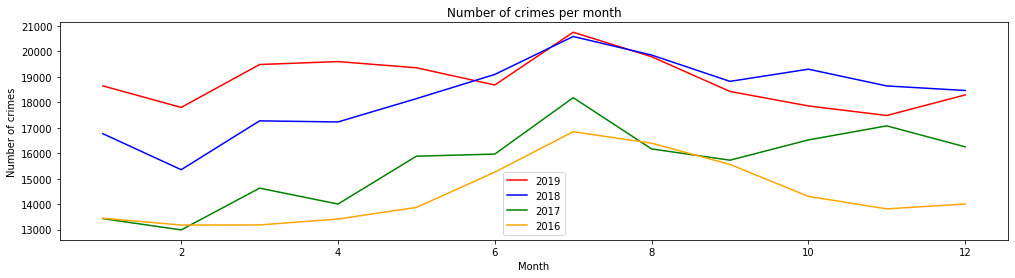

In [33]:
plt.figure(figsize=(17, 4))
plt.plot(crime_per_month_2019['month'], crime_per_month_2019['number_of_crimes'], color='red', label = 2019)
plt.plot(crime_per_month_2018['month'], crime_per_month_2018['number_of_crimes'], color='blue', label = 2018)
plt.plot(crime_per_month_2017['month'], crime_per_month_2017['number_of_crimes'], color='green', label = 2017)
plt.plot(crime_per_month_2016['month'], crime_per_month_2016['number_of_crimes'], color='orange', label = 2016)
plt.xlabel('Month')
plt.ylabel('Number of crimes')
plt.title('Number of crimes per month')
plt.legend()
plt.show()

#### By neighbourhood

In [34]:
bcn_crime_per_neighbourhood = bcn_crime_original.copy()
bcn_crime_per_neighbourhood = bcn_crime_per_neighbourhood.groupby(['year', 'ABP'], as_index = False).sum()
bcn_crime_per_neighbourhood = bcn_crime_per_neighbourhood.drop(['month', 'day'], axis=1)
bcn_crime_per_neighbourhood = bcn_crime_per_neighbourhood.drop((bcn_crime_per_neighbourhood[bcn_crime_per_neighbourhood.ABP == 'ABP Barcelona'].index))

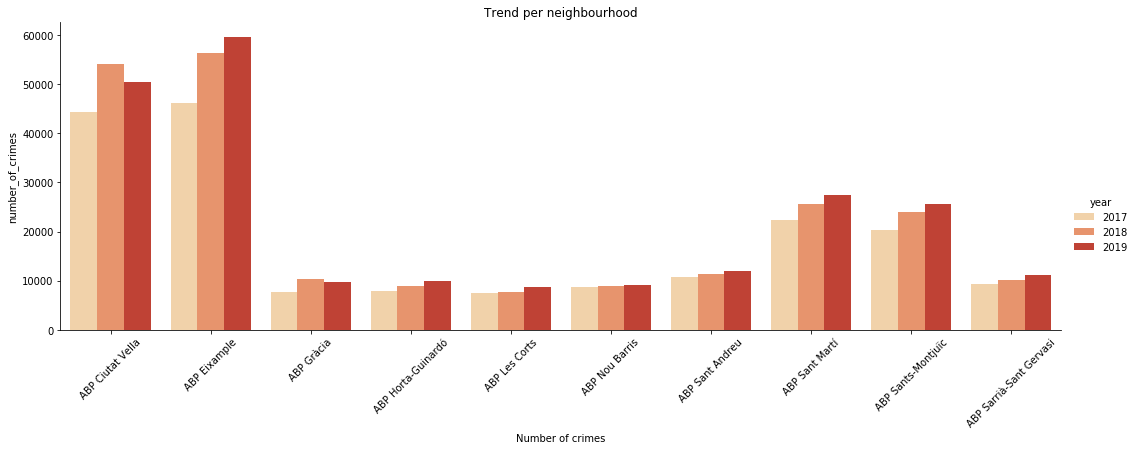

In [35]:
bcn_crime_per_neighbourhood_2017_2019 = bcn_crime_per_neighbourhood[(bcn_crime_per_neighbourhood['year'] == 2019) | (bcn_crime_per_neighbourhood['year'] == 2018) | (bcn_crime_per_neighbourhood['year'] == 2017)]
sns.set_palette("OrRd", 3)
sns.catplot(x='ABP', y="number_of_crimes", hue="year", height=5, aspect=3, data=bcn_crime_per_neighbourhood_2017_2019, kind="bar")
plt.title('Trend per neighbourhood')
plt.xlabel('Number of crimes')
plt.xticks(rotation=45)
plt.show()

#### By type of crime 

In [36]:
##Stablish the crimes considered violent

violent_crimes = ['Homicidi consumat', 'Homicidi temptativa', 'Lesions', 'Robatori amb força', 'Robatori amb força interior vehicle',
'Robatori amb violència i/o intimidació', 'Abusos sexuals', 'Agressions sexuals', 'Assassinat consumat', 'Segrest', 'Assassinat temptativa', 'Tortures'] 

#### Percentage grouth of violent crime vs total crime

In [37]:
violent_vs_not_violent = bcn_crime_original.copy()

In [38]:
violent_vs_not_violent.drop(['RP', 'ABP', 'month', 'day', 'date'], axis=1, inplace=True)

In [39]:
violent_c_df = violent_vs_not_violent[violent_vs_not_violent['type_of_crime'].isin(violent_crimes)]
non_violent_c_df = violent_vs_not_violent[~violent_vs_not_violent['type_of_crime'].isin(violent_crimes)]

violent_c_df_year = violent_c_df.groupby(['year'], as_index=False).sum()
non_violent_c_df_year = non_violent_c_df.groupby(['year'], as_index=False).sum()
violent_non_violent_per_year = pd.merge(non_violent_c_df_year, violent_c_df_year, on='year')

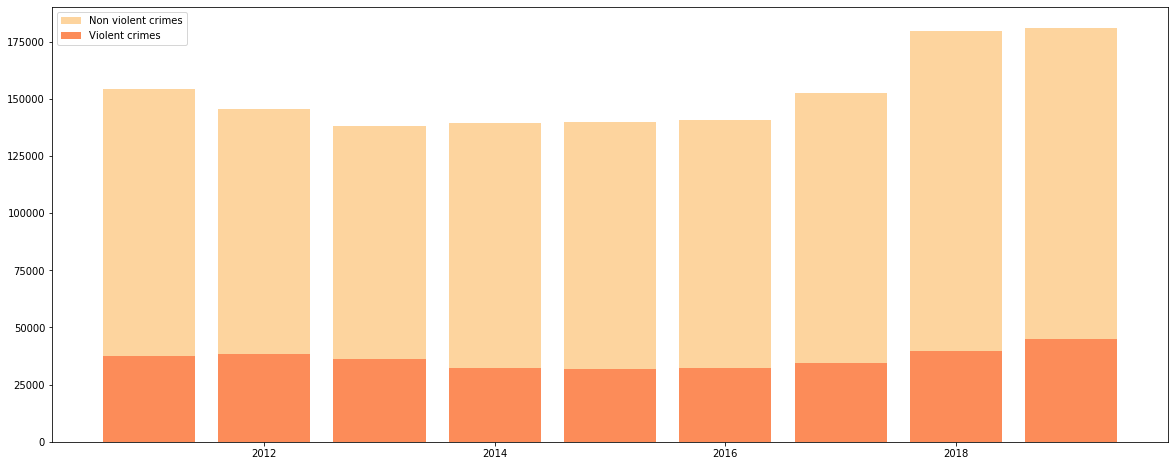

In [40]:
plt.figure(figsize = (20,8))
plt.bar(violent_non_violent_per_year['year'], violent_non_violent_per_year['number_of_crimes_x'], label = 'Non violent crimes')
plt.bar(violent_non_violent_per_year['year'], violent_non_violent_per_year['number_of_crimes_y'], label = 'Violent crimes')
plt.legend()
plt.show()


#### Percentage grouth per type of violent crime vs total crime

In [41]:
violent_crimes_redux = ['Homicidi consumat', 'Homicidi temptativa', 'Lesions', 'Robatori amb força', 'Robatori amb força interior vehicle',
'Robatori amb violència i/o intimidació', 'Abusos sexuals', 'Agressions sexuals'] 

In [42]:
type_of_crime = bcn_crime_original.copy()

In [43]:
type_of_crime = type_of_crime.groupby(['type_of_crime', 'year'], as_index=False).sum()
type_of_crime.drop(['month', 'day'], axis=1, inplace=True)
##Change 0 by a very small number to avoid 0Division Error.
type_of_crime.replace({"number_of_crimes":{0:0.0000000000000001}}, inplace=True)
type_of_crime['#previous_year'] = type_of_crime.number_of_crimes.shift()
type_of_crime['%growth'] = type_of_crime.apply(lambda x : (x['number_of_crimes'] - x['#previous_year'])/x['#previous_year'], axis=1)

In [44]:
type_of_crime = type_of_crime[type_of_crime.year != 2011]

In [45]:
def create_plot(crimetype, ax):
    global type_of_crime
    global bcn_crime_per_year_perc
    temp_df = type_of_crime[type_of_crime.type_of_crime == crimetype]
    temp_df['cum_sum'] = temp_df['%growth'].cumsum()
    sns.lineplot(temp_df['year'], temp_df['cum_sum']*100, color = 'red', ax=ax)
    sns.lineplot(bcn_crime_per_year_perc['year'], bcn_crime_per_year_perc['cum_sum']*100, color = 'black', ax=ax)
    ax.set_title(crimetype)
    #ax.set_ylim((-0.5, 1))


C:\Users\miner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


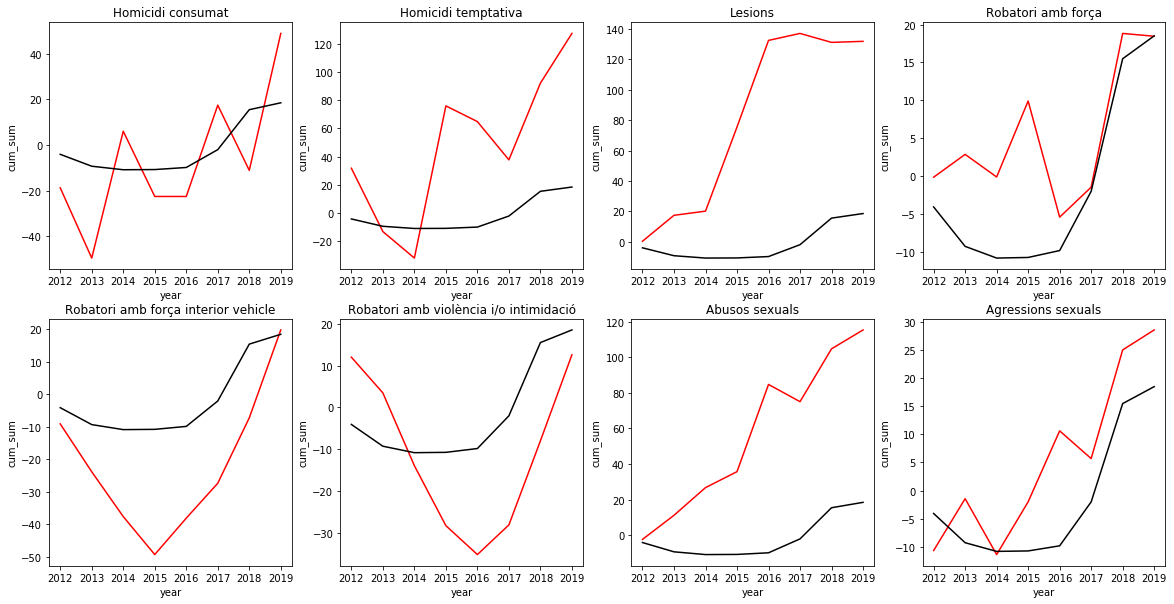

In [46]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i, j in zip(violent_crimes_redux, ax.flatten()):
    create_plot(i, j)

### Spain crime vs population

In [50]:
crime_vs_population = spain_crime.copy()
crime_vs_population = crime_vs_population.drop(['month', 'day', 'trimester', 'date'], axis=1)
crime_vs_population = crime_vs_population.groupby(['city', 'year'], as_index = False).sum()
crime_vs_population = pd.merge(crime_vs_population, spain_population, on='city')
crime_vs_population_2019 = crime_vs_population[crime_vs_population.year == 2019]

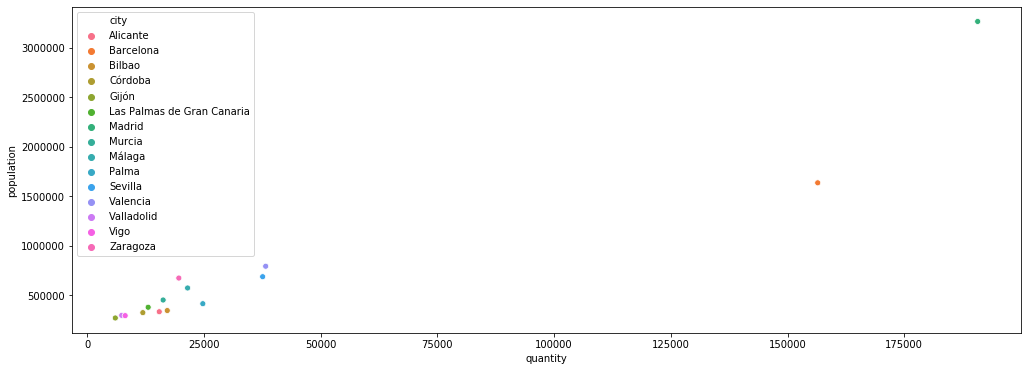

In [51]:
plt.figure(figsize=(17,6))
sns.scatterplot(x="quantity", y="population", hue="city", data=crime_vs_population_2019)
plt.show()

#### In perspective: calculate the ratio of criminality per 1000pax

In [52]:
crime_vs_population= crime_vs_population.drop(['provincia', 'ccaa'], axis=1)

In [53]:
crime_vs_population['crime_per_mil'] = crime_vs_population.apply(lambda x : x['quantity']/x['population'], axis=1)

In [54]:
crime_vs_population.head(3)

,city,year,quantity,population,crime_per_mil
0,Alicante,2016,11314,334887,0.033785
1,Alicante,2017,10740,334887,0.032071
2,Alicante,2018,19794,334887,0.059107


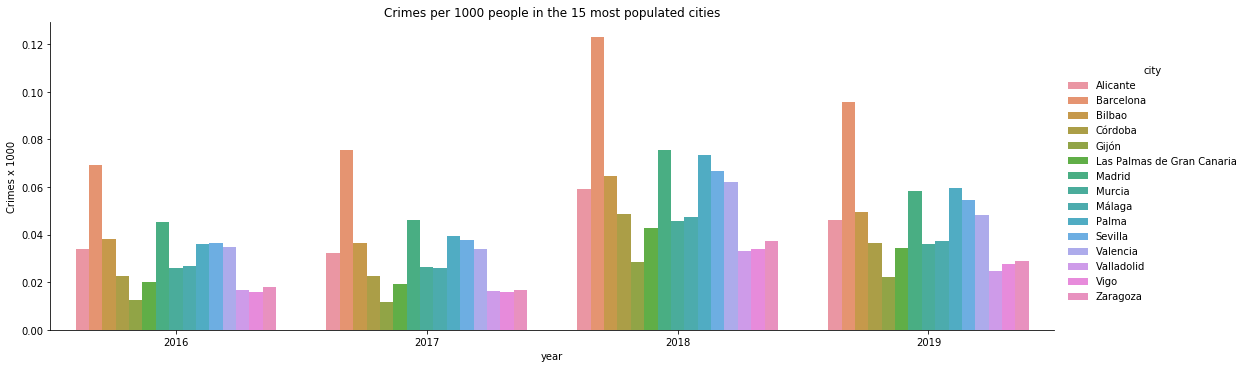

In [55]:
sns.set_palette("OrRd", 3)
sns.catplot(x='year', y="crime_per_mil", hue="city", height=5, aspect=3, data=crime_vs_population, kind="bar")
plt.title('Crimes per 1000 people in the 15 most populated cities')
plt.ylabel('Crimes x 1000')
plt.show()

### Reality vs perception

#### Compare deviation from the mean in comments and crimes

In [56]:
### Get the total number of crimes from january to august 2019 and the total number of crimes for august 2019
total_crimes_jan_aug_2019 = bcn_crime_original.copy()
total_crimes_jan_aug_2019 = total_crimes_jan_aug_2019[total_crimes_jan_aug_2019.year == 2019]
total_crimes_jan_aug_2019 = total_crimes_jan_aug_2019[(total_crimes_jan_aug_2019.month == 1) | (total_crimes_jan_aug_2019.month == 2) | (total_crimes_jan_aug_2019.month == 3) | (total_crimes_jan_aug_2019.month == 4) | (total_crimes_jan_aug_2019.month == 5) | (total_crimes_jan_aug_2019.month == 6) | (total_crimes_jan_aug_2019.month == 7) | (total_crimes_jan_aug_2019.month == 8)]
total_crimes_aug_2019 = total_crimes_jan_aug_2019[(total_crimes_jan_aug_2019.month == 8)]

In [57]:
## Calculate the mean of crimes per month during january to august 2019  
total_crimes_jan_aug_2019 = total_crimes_jan_aug_2019.groupby('month', as_index = False).sum()
total_crimes_jan_aug_2019.drop(['year', 'day'], axis=1, inplace=True)

In [58]:
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
array_crimes = np.array(total_crimes_jan_aug_2019.number_of_crimes).reshape(-1, 1)
scaled_df = scaler.fit_transform(array_crimes)
total_crimes_jan_aug_2019['scaled_crimes'] = scaled_df
total_crimes_jan_aug_2019

,month,number_of_crimes,scaled_crimes
0,1,18645,-0.742598
1,2,17798,-1.761603
2,3,19483,0.265579
3,4,19598,0.403933
4,5,19355,0.111585
5,6,18679,-0.701694
6,7,20750,1.789876
7,8,19790,0.634923


In [59]:
### Get the total number of tweets from january to august 2019 and the total number of tweets for august 2019
total_tweets_jan_aug_2019 = tweets_original.copy()
total_tweets_jan_aug_2019 = total_tweets_jan_aug_2019[total_tweets_jan_aug_2019.year == 2019]
total_tweets_jan_aug_2019 = total_tweets_jan_aug_2019[(total_tweets_jan_aug_2019.month == 1) | (total_tweets_jan_aug_2019.month == 2) | (total_tweets_jan_aug_2019.month == 3) | (total_tweets_jan_aug_2019.month == 4) | (total_tweets_jan_aug_2019.month == 5) | (total_tweets_jan_aug_2019.month == 6) | (total_tweets_jan_aug_2019.month == 7) | (total_tweets_jan_aug_2019.month == 8)]
total_tweets_aug_2019 = total_tweets_jan_aug_2019[(total_tweets_jan_aug_2019.month == 8)]

In [60]:
## Calculate the mean of crimes per month during january to august 2019  
total_tweets_jan_aug_2019 = total_tweets_jan_aug_2019.groupby('month', as_index = False).count()
total_tweets_jan_aug_2019.drop(['year', 'day', 'timestamp'], axis=1, inplace=True)


In [61]:
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
array_tweets = np.array(total_tweets_jan_aug_2019.tweet_id).reshape(-1, 1)
scaled_df = scaler.fit_transform(array_tweets)
total_tweets_jan_aug_2019['scaled_tweets'] = scaled_df
total_tweets_jan_aug_2019

,month,tweet_id,scaled_tweets
0,1,3366,-0.156930
1,2,2262,-0.672364
2,3,2703,-0.466471
3,4,2361,-0.626143
4,5,2377,-0.618673
5,6,2413,-0.601866
6,7,5387,0.786633
7,8,8748,2.355814
